In [1]:
import tensorflow as tf
print("Your current tensorflow version is: ", tf.__version__)

Your current tensorflow version is:  2.9.1


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2829215767029443220
xla_global_id: -1
]


In [6]:
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  []


## Tensor: Multi dimensional array used in Tensorflow
- Constant
- Variable

In [3]:
import numpy as np

In [4]:
a = tf.constant(3)
print("your tensor rank is {}".format(tf.rank(a)))
a

your tensor rank is 0


<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [7]:
b = tf.constant([[1,2],[0,0]])
print("your tensor rank is {}".format(tf.rank(b)))
b

your tensor rank is 2


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [0, 0]])>

In [8]:
c = tf.constant(np.random.rand(2,2))
print("your tensor rank is {}".format(tf.rank(c)))
c

your tensor rank is 2


<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.27137952, 0.89933453],
       [0.10702267, 0.003717  ]])>

In [9]:
x = tf.Variable(3)
x

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [10]:
x = tf.Variable(a)
x

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [11]:
b = tf.constant([[1,2],
                 [3,4]])
print(b)

b = tf.cast(b, dtype = tf.float32)
print(b)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [13]:
x = tf.Variable(2)
y = tf.Variable(5)
f = x * x * y + y + 2
print(f)

tf.Tensor(27, shape=(), dtype=int32)


## Common operations

In [14]:
tensor_test = tf.constant([[1,2],
                          [3,4]])
tensor_test

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [15]:
tensor_test.shape

TensorShape([2, 2])

In [16]:
tensor_test.numpy()

array([[1, 2],
       [3, 4]])

In [17]:
# broadcasting：trailing dimension are the same or one of them is 1
tensor_test = tensor_test + 6
tensor_test

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10]])>

In [18]:
tensor_test = tf.constant([[1,2],
                          [3,4]])

tensor_test = tf.square(tensor_test)
tensor_test

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  4],
       [ 9, 16]])>

In [19]:
#sqrt must be on float
tensor_test = tf.constant([[1. ,4. ],
                          [9. ,16. ]])
tensor_test = tf.sqrt(tensor_test)
tensor_test

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [20]:
tensor_test = tf.matmul(tensor_test, tensor_test)
tensor_test

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 7., 10.],
       [15., 22.]], dtype=float32)>

In [21]:
#numpy functions can be applied on tensor. numpy array is returned
tensor_test = tf.constant([[1,4],
                           [9,16]])
np.square(tensor_test)

array([[  1,  16],
       [ 81, 256]], dtype=int32)

## Automatic differentiation

In [22]:
# GradientTape can only be applied on tf.Variable with dtype float 
x = tf.Variable([2.])

with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    
print('The gradient df/dx where f=(x^2):\n', tape.gradient(f, x))

The gradient df/dx where f=(x^2):
 tf.Tensor([4.], shape=(1,), dtype=float32)


In [23]:
#otherwise
x = tf.constant([2.0]) #constant

with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    
print('The gradient df/dx where f=(x^2):\n', tape.gradient(f, x))

x = tf.Variable([2]) #non float

with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    
print('The gradient df/dx where f=(x^2):\n', tape.gradient(f, x))

The gradient df/dx where f=(x^2):
 None
The gradient df/dx where f=(x^2):
 None


In [24]:
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:
    f = x ** 2
    h = y ** 3

# Print gradient output
print('The gradient df/dx where f=(x^2):\n', tape.gradient(f, x))
print('The gradient dh/dx where h=(x^3):\n', tape.gradient(h, y))

The gradient df/dx where f=(x^2):
 tf.Tensor([4.], shape=(1,), dtype=float32)
The gradient dh/dx where h=(x^3):
 tf.Tensor([27.], shape=(1,), dtype=float32)


In [25]:
# persistent = False can only be on first function
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    h = y ** 3

# Print gradient output
print('The gradient df/dx where f=(x^2):\n', tape.gradient(f, x))
print('The gradient dh/dx where h=(x^3):\n', tape.gradient(h, y))

The gradient df/dx where f=(x^2):
 tf.Tensor([4.], shape=(1,), dtype=float32)


RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

In [30]:
#watch_accessed_variables=False, only check watched variable
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=True, watch_accessed_variables=False) as tape:
    tape.watch([x,y])
    f = x ** 2
    h = y ** 3

# Print gradient output
print('The gradient df/dx where f=(x^2):\n', tape.gradient(f, x))
print('The gradient dh/dx where h=(x^3):\n', tape.gradient(h, y))

with tf.GradientTape(persistent=True, watch_accessed_variables=False) as tape:
    f = x ** 2
    h = y ** 3

# Print gradient output
print('The gradient df/dx where f=(x^2):\n', tape.gradient(f, x))
print('The gradient dh/dx where h=(x^3):\n', tape.gradient(h, y))

The gradient df/dx where f=(x^2):
 tf.Tensor([4.], shape=(1,), dtype=float32)
The gradient dh/dx where h=(x^3):
 tf.Tensor([27.], shape=(1,), dtype=float32)
The gradient df/dx where f=(x^2):
 None
The gradient dh/dx where h=(x^3):
 None


In [31]:
# gradient on multi-variable function
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:
    f = x ** 2 * y + y + 2

# Print gradient output
print('The gradient df/dx and df/dy where f=(x^2*y+y+2):\n', tape.gradient(f, [x,y]))

The gradient df/dx and df/dy where f=(x^2*y+y+2):
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([12.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.], dtype=float32)>]


In [32]:
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:
    f = x ** 2 * y + y + 2

# Print gradient output
print('The gradient df/dy where f=(x^2*y+y+2):\n', tape.gradient(f, x))
print('The gradient df/dy where f=(x^2*y+y+2):\n', tape.gradient(f, y))

The gradient df/dy where f=(x^2*y+y+2):
 tf.Tensor([12.], shape=(1,), dtype=float32)
The gradient df/dy where f=(x^2*y+y+2):
 tf.Tensor([5.], shape=(1,), dtype=float32)


## Linear Regression with Tensorflow

In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [34]:
def f(X):
    """
    input: x
    output: y = 0.7x - 42 goal to fit
    """
    return 0.7*X - 42

In [35]:
N = 100
noise_level = 0.8
trainX = np.linspace(165, 190, N)
np.random.shuffle(trainX)
trainY = f(trainX) + np.random.randn(N) * noise_level

learning_rate = 0.1
training_epochs = 300
display_step = 50

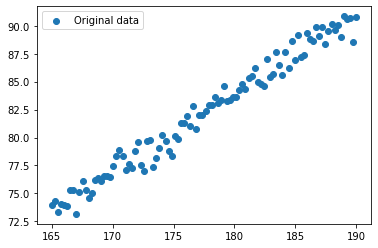

In [36]:
plt.scatter(trainX, trainY, label='Original data')
plt.legend()

In [37]:
def lr_forward(x, w, b):
    return x * w + b

def loss_fuction(y, y_hat):
    return tf.reduce_mean(tf.square(y-y_hat))

def data_loader(x, y, batch_size, shuffle=True):
    ind = list(range(len(x)))
    if shuffle == True:
        np.random.shuffle(ind)
    for i in range(0, len(ind), batch_size):
        idx = np.array(ind[i:min(i+batch_size, len(x))])
        yield x[idx], y[idx]

In [38]:
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
batch_size = 32

trainX = np.reshape(trainX, (-1,1))
trainY = np.reshape(trainY, (-1,1))
trainX, testX, trainY, testY = train_test_split(trainX, 
                                                trainY, 
                                                test_size=0.2, 
                                                random_state=1)

In [39]:
#pre processing: normalize
# trainX = (trainX - trainX.min()) / (trainX.max() - trainX.min())
# trainY = (trainY - trainY.min()) / (trainY.max() - trainY.min())

x_scaler = StandardScaler()
y_scaler = StandardScaler()

trainX = x_scaler.fit_transform(trainX)
trainY = y_scaler.fit_transform(trainY)

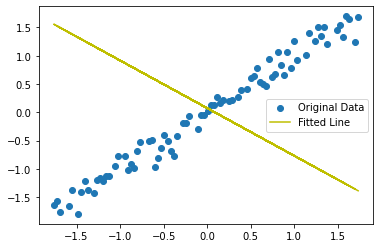

In [40]:
plt.scatter(trainX, trainY, label='Original Data')
plt.plot(trainX, lr_forward(trainX, w,b), c='y',label='Fitted Line')
plt.legend()

In [41]:
for i in range(training_epochs):
    for X, y in data_loader(trainX, trainY, batch_size):
        with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:
            #get loss for current batch
            loss = loss_fuction(y, lr_forward(X, w, b))
            
        #get gradient, update parameter
        delta_w, delta_b = tape.gradient(loss, [w, b])
        w.assign_sub(learning_rate * delta_w)
        b.assign_sub(learning_rate * delta_b)
    
    #get total loss
    train_loss = loss_fuction(trainY, lr_forward(trainX, w, b))
    print('epoch %d, loss %f' % (i+1, tf.reduce_mean(train_loss)))

epoch 1, loss 0.895207
epoch 2, loss 0.264716
epoch 3, loss 0.090641
epoch 4, loss 0.041656
epoch 5, loss 0.029466
epoch 6, loss 0.027168
epoch 7, loss 0.025521
epoch 8, loss 0.025162
epoch 9, loss 0.025067
epoch 10, loss 0.025155
epoch 11, loss 0.025109
epoch 12, loss 0.025063
epoch 13, loss 0.025091
epoch 14, loss 0.025135
epoch 15, loss 0.025054
epoch 16, loss 0.025063
epoch 17, loss 0.025084
epoch 18, loss 0.025152
epoch 19, loss 0.025087
epoch 20, loss 0.025192
epoch 21, loss 0.025120
epoch 22, loss 0.025049
epoch 23, loss 0.025134
epoch 24, loss 0.025079
epoch 25, loss 0.025054
epoch 26, loss 0.025070
epoch 27, loss 0.025066
epoch 28, loss 0.025121
epoch 29, loss 0.025077
epoch 30, loss 0.025067
epoch 31, loss 0.025064
epoch 32, loss 0.025156
epoch 33, loss 0.025054
epoch 34, loss 0.025113
epoch 35, loss 0.025165
epoch 36, loss 0.025338
epoch 37, loss 0.025147
epoch 38, loss 0.025169
epoch 39, loss 0.025108
epoch 40, loss 0.025050
epoch 41, loss 0.025087
epoch 42, loss 0.025053
e

In [42]:
processed_x = x_scaler.transform(np.reshape(testX, (-1, 1)))
predicted_y = y_scaler.inverse_transform(lr_forward(processed_x, w,b))

In [43]:
r2_score(testY, predicted_y)

0.9756947331358382

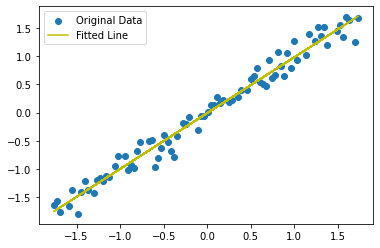

In [44]:
plt.scatter(trainX, trainY, label='Original Data')
plt.plot(trainX, lr_forward(trainX, w,b), c='y',label='Fitted Line')
plt.legend()

In [45]:
print(w)
print(b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9909252>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.007621241>


In [46]:
print(w * y_scaler.scale_ / x_scaler.scale_)
print(- w * y_scaler.scale_ / x_scaler.scale_ * x_scaler.mean_ + y_scaler.scale_ * b + y_scaler.mean_)

tf.Tensor([0.7004467], shape=(1,), dtype=float32)
tf.Tensor([-42.185417], shape=(1,), dtype=float32)


## Keras API

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='sgd', loss='mse', metrics='mse')
history = model.fit(trainX, trainY, steps_per_epoch=8, epochs=300)

Epoch 1/300
8/8 [==============================] - 2s 1ms/step - loss: 0.0351 - mse: 0.0351
Epoch 2/300
8/8 [==============================] - 0s 959us/step - loss: 0.0323 - mse: 0.0323
Epoch 3/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0304 - mse: 0.0304
Epoch 4/300
8/8 [==============================] - 0s 995us/step - loss: 0.0289 - mse: 0.0289
Epoch 5/300
8/8 [==============================] - 0s 996us/step - loss: 0.0279 - mse: 0.0279
Epoch 6/300
8/8 [==============================] - 0s 993us/step - loss: 0.0271 - mse: 0.0271
Epoch 7/300
8/8 [==============================] - 0s 934us/step - loss: 0.0265 - mse: 0.0265
Epoch 8/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0262 - mse: 0.0262
Epoch 9/300
8/8 [==============================] - 0s 855us/step - loss: 0.0259 - mse: 0.0259
Epoch 10/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0257 - mse: 0.0257
Epoch 11/300
8/8 [==============================] - 0s 712us/step -

8/8 [==============================] - 0s 1ms/step - loss: 0.0251 - mse: 0.0251
Epoch 88/300
8/8 [==============================] - 0s 717us/step - loss: 0.0251 - mse: 0.0251
Epoch 89/300
8/8 [==============================] - 0s 987us/step - loss: 0.0252 - mse: 0.0252
Epoch 90/300
8/8 [==============================] - 0s 822us/step - loss: 0.0252 - mse: 0.0252
Epoch 91/300
8/8 [==============================] - 0s 855us/step - loss: 0.0251 - mse: 0.0251
Epoch 92/300
8/8 [==============================] - 0s 742us/step - loss: 0.0251 - mse: 0.0251
Epoch 93/300
8/8 [==============================] - 0s 990us/step - loss: 0.0251 - mse: 0.0251
Epoch 94/300
8/8 [==============================] - 0s 855us/step - loss: 0.0252 - mse: 0.0252
Epoch 95/300
8/8 [==============================] - 0s 855us/step - loss: 0.0251 - mse: 0.0251
Epoch 96/300
8/8 [==============================] - 0s 715us/step - loss: 0.0251 - mse: 0.0251
Epoch 97/300
8/8 [==============================] - 0s 853us/step

8/8 [==============================] - 0s 713us/step - loss: 0.0251 - mse: 0.0251
Epoch 173/300
8/8 [==============================] - 0s 855us/step - loss: 0.0252 - mse: 0.0252
Epoch 174/300
8/8 [==============================] - 0s 712us/step - loss: 0.0252 - mse: 0.0252
Epoch 175/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0251 - mse: 0.0251
Epoch 176/300
8/8 [==============================] - 0s 792us/step - loss: 0.0252 - mse: 0.0252
Epoch 177/300
8/8 [==============================] - 0s 998us/step - loss: 0.0251 - mse: 0.0251
Epoch 178/300
8/8 [==============================] - 0s 712us/step - loss: 0.0251 - mse: 0.0251
Epoch 179/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0251 - mse: 0.0251
Epoch 180/300
8/8 [==============================] - 0s 855us/step - loss: 0.0252 - mse: 0.0252
Epoch 181/300
8/8 [==============================] - 0s 857us/step - loss: 0.0251 - mse: 0.0251
Epoch 182/300
8/8 [==============================] - 0s 85

8/8 [==============================] - 0s 851us/step - loss: 0.0251 - mse: 0.0251
Epoch 258/300
8/8 [==============================] - 0s 857us/step - loss: 0.0251 - mse: 0.0251
Epoch 259/300
8/8 [==============================] - 0s 716us/step - loss: 0.0251 - mse: 0.0251
Epoch 260/300
8/8 [==============================] - 0s 856us/step - loss: 0.0252 - mse: 0.0252
Epoch 261/300
8/8 [==============================] - 0s 853us/step - loss: 0.0251 - mse: 0.0251
Epoch 262/300
8/8 [==============================] - 0s 858us/step - loss: 0.0251 - mse: 0.0251
Epoch 263/300
8/8 [==============================] - 0s 712us/step - loss: 0.0252 - mse: 0.0252
Epoch 264/300
8/8 [==============================] - 0s 856us/step - loss: 0.0252 - mse: 0.0252
Epoch 265/300
8/8 [==============================] - 0s 712us/step - loss: 0.0252 - mse: 0.0252
Epoch 266/300
8/8 [==============================] - 0s 997us/step - loss: 0.0252 - mse: 0.0252
Epoch 267/300
8/8 [==============================] - 0

In [49]:
processed_x = x_scaler.transform(np.reshape(testX, (-1, 1)))
predicted_y = y_scaler.inverse_transform(model(processed_x.astype("float32")))

In [50]:
r2_score(testY, predicted_y)

0.9757123334577587

In [51]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9870833]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00017185], dtype=float32)>]

In [52]:
model.get_weights()

[array([[0.9870833]], dtype=float32), array([0.00017185], dtype=float32)]